# Classification Tree Model

In [109]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.utils import shuffle
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder


import pickle


In [110]:
# Import dataframe

df0 = pd.read_pickle('../../Data/Processed/abc_classification_modelling.p')
df0.head()

,customer_id,signup_flag,distance_from_store,gender,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
0,74,1,3.38,F,0.59,1586.89,195,26,5,61.034231
1,524,1,4.76,F,0.52,2397.26,258,27,5,88.787407
2,607,1,4.45,F,0.49,1279.91,183,22,5,58.177727
3,343,0,0.91,M,0.54,967.14,102,17,5,56.890588
4,322,1,3.02,F,0.63,1566.35,182,30,5,52.211667


In [111]:
# Remove non desired data from model (Non predictor data or ethics concern)
df1 = df0.drop(['customer_id'], axis=1)

In [112]:
# Shuffle data
df2 = shuffle(df1, random_state=42)

In [113]:
# Class balance 
df2['signup_flag'].value_counts(normalize=True)

signup_flag
0    0.689535
1    0.310465
Name: proportion, dtype: float64

In [114]:
# Deal with missing values
df2.isna().sum()

signup_flag             0
distance_from_store     5
gender                  5
credit_score            8
total_sales             0
total_items             0
transaction_count       0
product_area_count      0
average_basket_value    0
dtype: int64

In [115]:
# Low value count for missing data so we drop
df3 = df2.dropna()

In [116]:
df3.head()

,signup_flag,distance_from_store,gender,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
714,0,1.64,M,0.58,27.81,6,3,3,9.270000
605,0,0.88,M,0.63,26.62,9,3,2,8.873333
120,0,0.56,M,0.62,886.78,154,18,4,49.265556
208,0,0.11,M,0.58,1256.19,168,34,5,36.946765
380,0,1.32,M,0.36,739.67,110,21,3,35.222381


In [117]:
df3.describe()

,signup_flag,distance_from_store,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
count,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000,847.000000
mean,0.304604,2.614545,0.597521,968.166411,143.877214,22.214876,4.177096,38.034161
std,0.460512,14.397590,0.102264,1073.647531,125.342694,11.721699,0.920887,24.243691
min,0.000000,0.000000,0.260000,2.090000,1.000000,1.000000,1.000000,2.090000
25%,0.000000,0.730000,0.530000,383.940000,77.000000,16.000000,4.000000,21.734700
50%,0.000000,1.640000,0.590000,691.640000,123.000000,23.000000,4.000000,31.069333
75%,1.000000,2.920000,0.670000,1121.530000,170.500000,28.000000,5.000000,46.429973
max,1.000000,400.970000,0.880000,7372.060000,910.000000,75.000000,5.000000,141.054091


In [118]:
# Split into input 'X' and output 'y'
X = df3.drop(['signup_flag'], axis = 1)
y = df3['signup_flag']

In [119]:
# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify = y
                                                    )

In [120]:
categorical_vars = ['gender']

one_hot_encoder = OneHotEncoder(sparse_output = False, drop = 'first')

X_train_encoded = one_hot_encoder.fit_transform(X_train[categorical_vars])
X_test_encoded = one_hot_encoder.transform(X_test[categorical_vars])

encoder_feature_names = one_hot_encoder.get_feature_names_out(categorical_vars)

X_train_encoded = pd.DataFrame(X_train_encoded, columns = encoder_feature_names)
X_train = pd.concat([X_train.reset_index(drop=True), X_train_encoded.reset_index(drop=True)], axis = 1)
X_train.drop(categorical_vars, axis=1, inplace=True)

X_test_encoded = pd.DataFrame(X_test_encoded, columns = encoder_feature_names)
X_test = pd.concat([X_test.reset_index(drop=True), X_test_encoded.reset_index(drop=True)], axis = 1)
X_test.drop(categorical_vars, axis=1, inplace=True)

In [121]:
X_train.head(1)

,distance_from_store,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value,gender_M
0,1.22,0.6,636.51,123,22,5,28.932273,0.0


In [122]:
X_test.head(1)

,distance_from_store,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value,gender_M
0,1.92,0.64,1283.76,191,30,5,42.792,0.0


In [123]:
# Build model
clf = DecisionTreeClassifier(random_state = 42,
                             max_depth = 9
                             )

In [124]:
# fit model
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, random_state=42)

In [125]:
y_pred_class = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:,1] # Return probability that the customer signed up

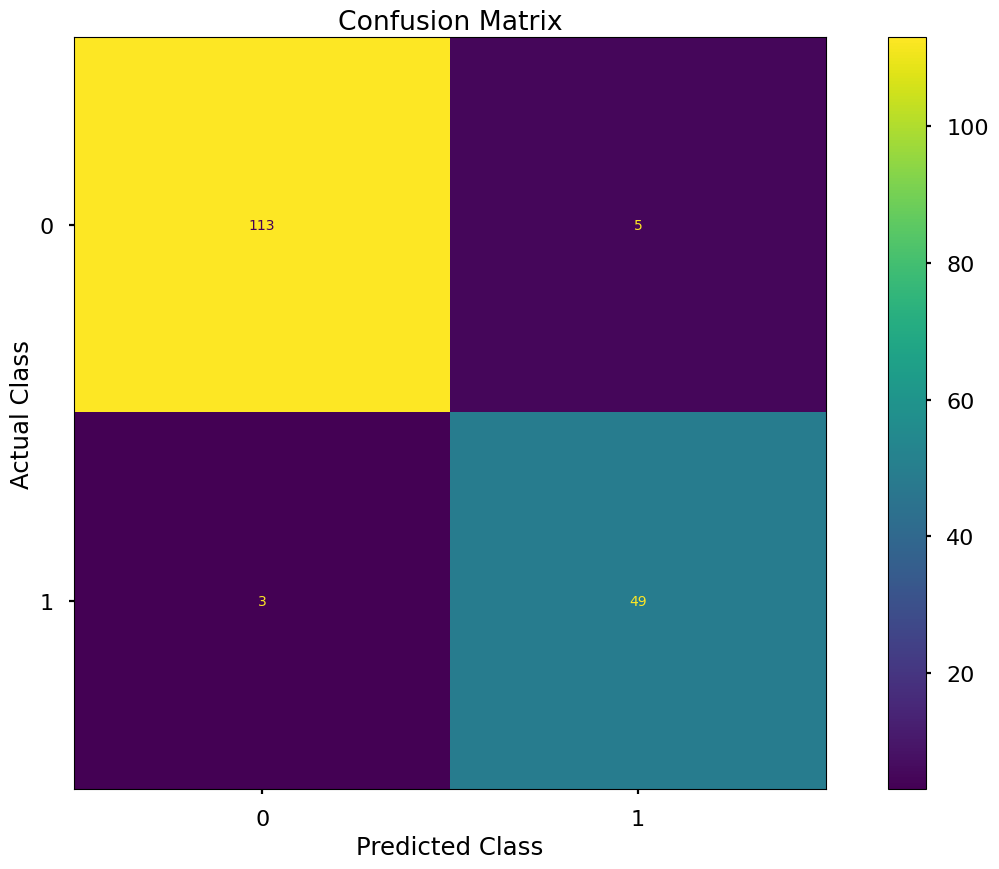

In [126]:
cm = confusion_matrix(y_test,
                      y_pred_class,
                      labels = clf.classes_
                      )

disp = ConfusionMatrixDisplay(confusion_matrix= cm,
                              display_labels = clf.classes_
                              )

disp.plot()
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


Calculated classification metrics

In [127]:
# Accuracy: number of correct classifications out of all attempted classifications
accuracy_score(y_test, y_pred_class)

0.9529411764705882

In [128]:
# Precision: Out of the predicted positive classifications, how many where right
precision_score(y_test, y_pred_class)

0.9074074074074074

In [129]:
# Recall: Out of the positive classifications, how many did we predict
recall_score(y_test, y_pred_class)

0.9423076923076923

In [130]:
# F1 : Harmonic mean of precision and recall
f1_score(y_test, y_pred_class)

0.9245283018867925

In [131]:
# Finding the max_depth
max_depth_list = list(range(1,15))
accuracy_scores = []

for depth in max_depth_list:
    clf = DecisionTreeClassifier(max_depth=depth,
                                  random_state=42
                                  )
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = f1_score(y_test,y_pred)
    accuracy_scores.append(accuracy)

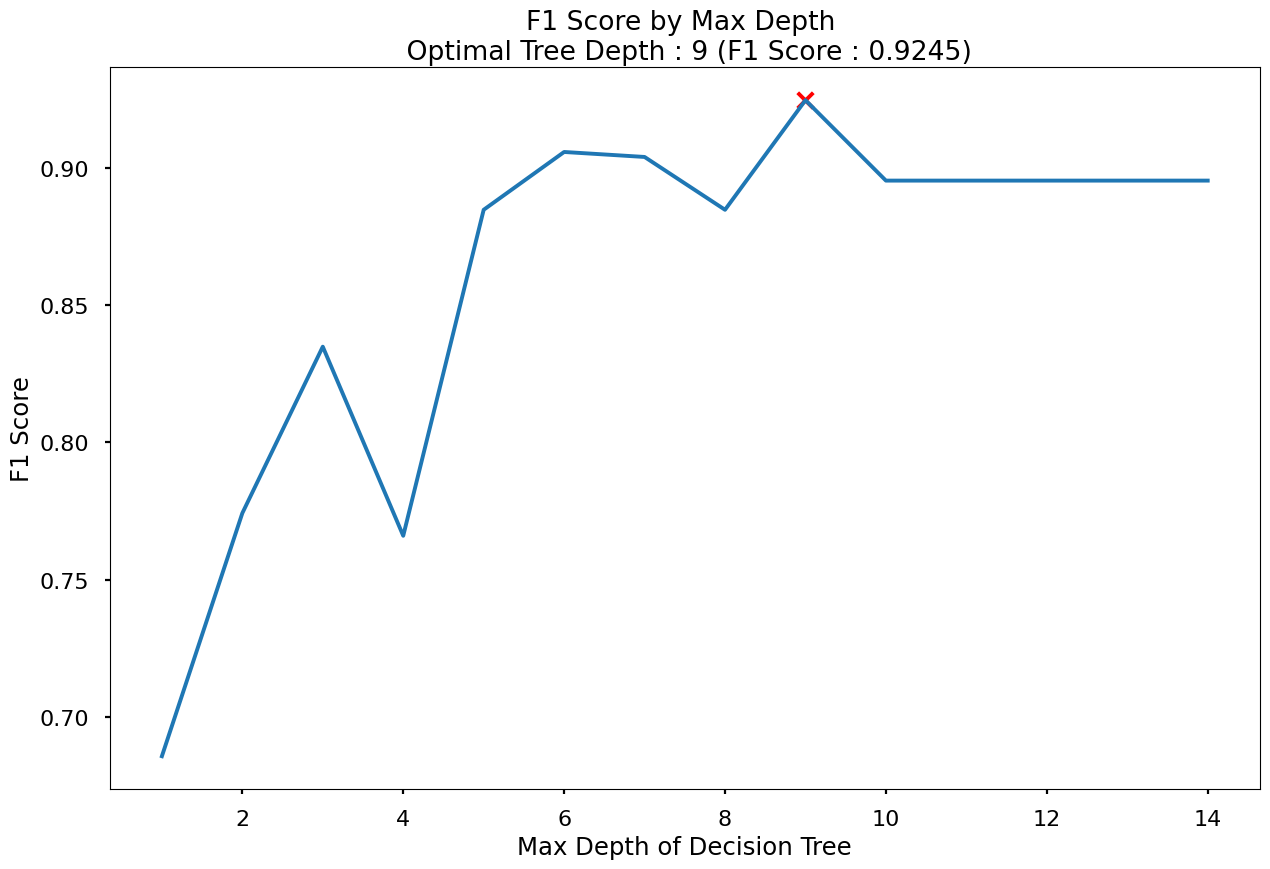

In [132]:
# Visualise max_depth
max_accuracy = max(accuracy_scores)
max_accuracy_index = accuracy_scores.index(max_accuracy)
optimal_depth = max_depth_list[max_accuracy_index]

plt.plot(max_depth_list,accuracy_scores)
plt.scatter(optimal_depth, max_accuracy, marker='x',color='red')
plt.title(f'F1 Score by Max Depth \n Optimal Tree Depth : {optimal_depth} (F1 Score : {round(max_accuracy,4)})')
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('F1 Score')
plt.tight_layout()
plt.show()


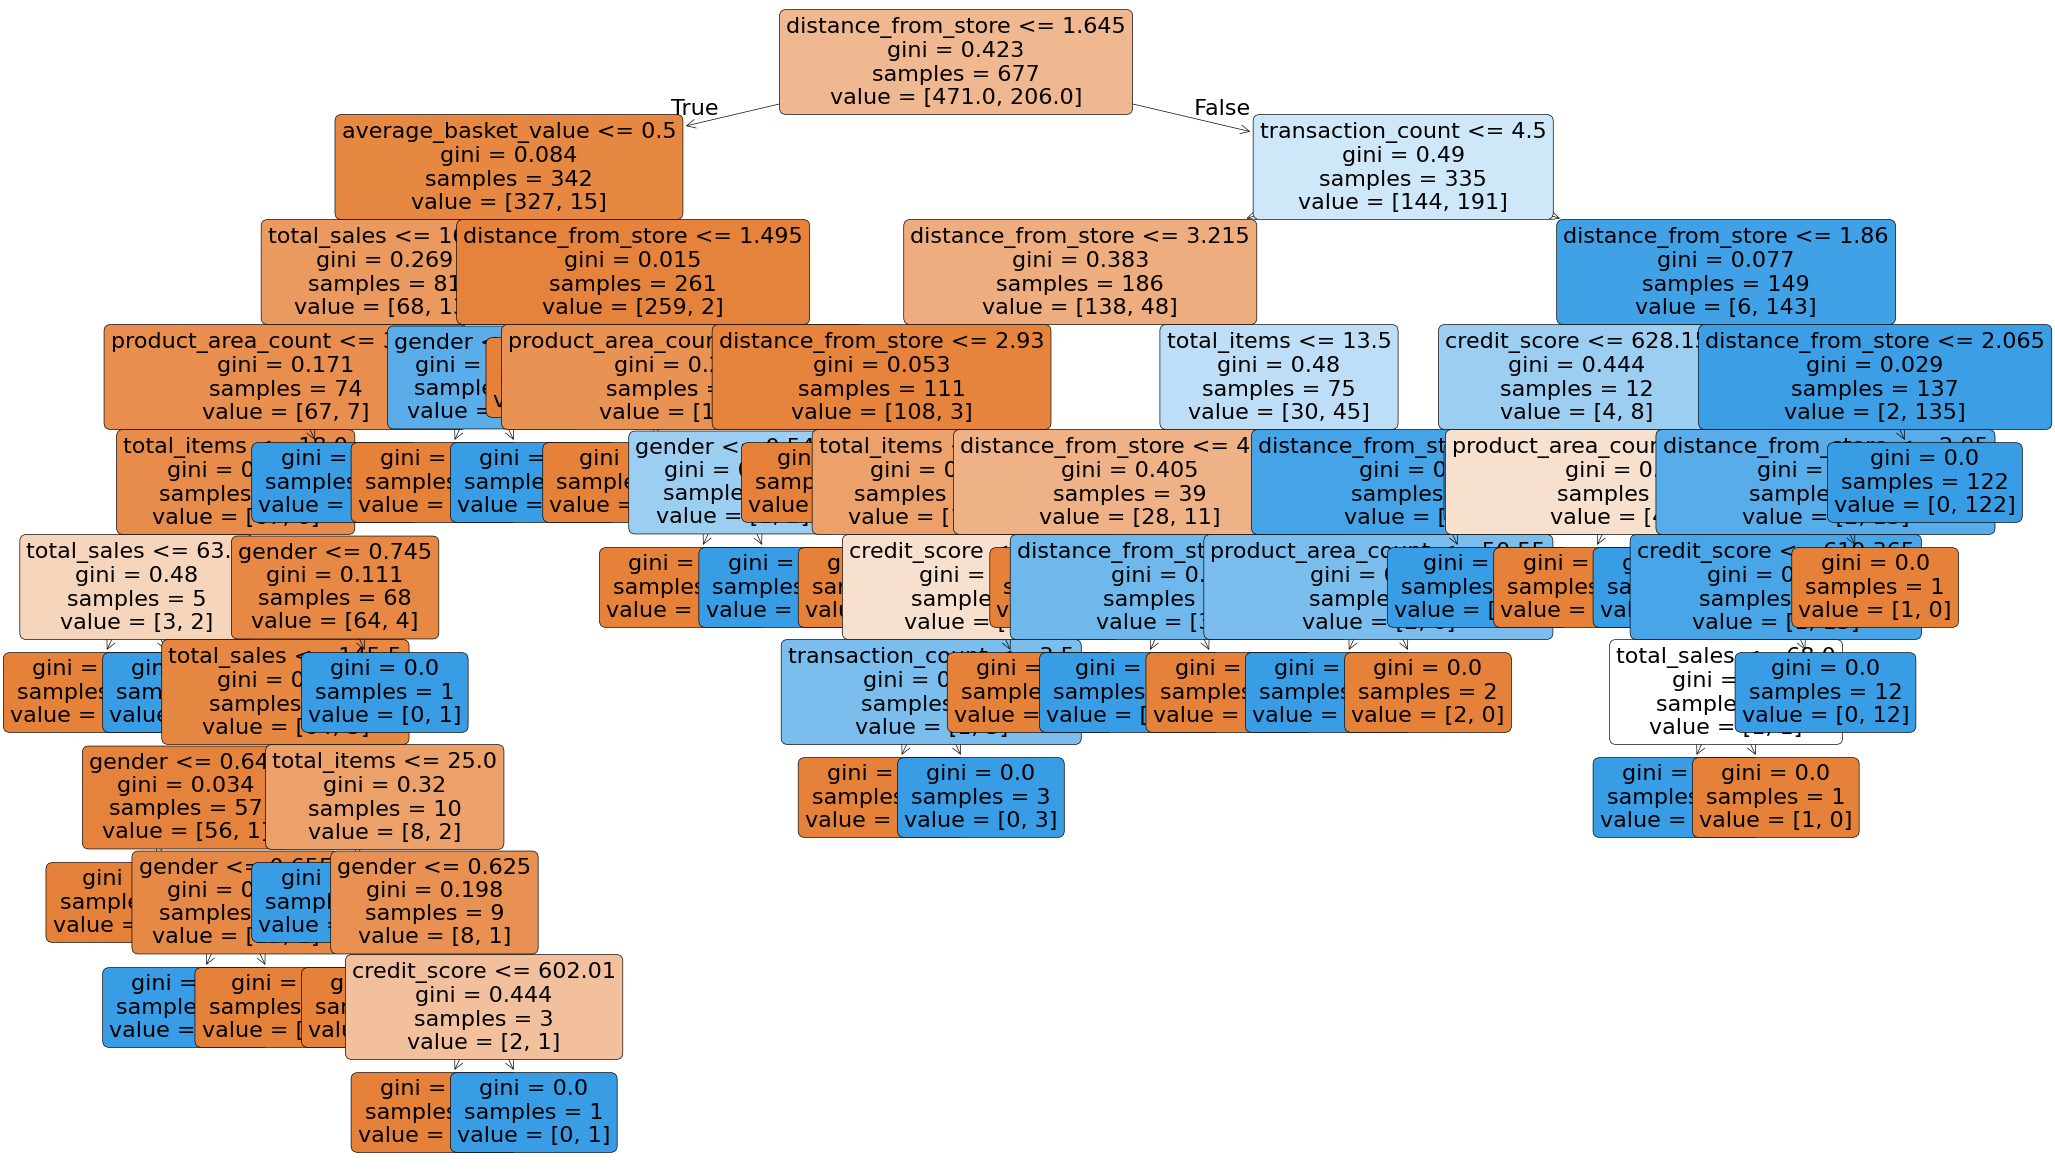

In [133]:
plt.figure(figsize=(25,15))
tree = plot_tree(clf,
                 feature_names = X.columns,
                 filled = True,
                 rounded = True,
                 fontsize = 16
                 )